# Python for High Resolution Mass Spectrometry 

> Learn to code, code to learn. 

An initial search for python packages to analyze high resolution mass spectrometry data, I found a few that seem rather useful. I will quickly explore them below. 

## `molmass` 

The `molmass` package can be installed from the Python package index: [https://pypi.org/project/molmass/](https://pypi.org/project/molmass/).

::: {.callout-warning} 
The latest version of `molmass` requires Python version 3.8. 
:::

In [ ]:
import molmass 
import numpy as np 
import pandas as pd 

You can check your version of a package with the `.__version__` attribute. The latest version is '2022.12.9'. 

In [ ]:
molmass.__version__

'2022.12.9'

Let's explore the properties of caffeine as detailed in the [code example](https://pypi.org/project/molmass/). 

In [ ]:
from molmass import Formula
f = Formula('C8H10N4O2')  # Caffeine
f

Formula('C8H10N4O2')

And look up the *average*, *nominal* and *monoisotopic mass*. 

In [ ]:
f.mass  # average mass 

194.19095199999998

In [ ]:
f.nominal_mass  # == f.isotope.massnumber

194

In [ ]:
f.monoisotopic_mass  # == f.isotope.mass

194.08037557916

In [ ]:
f.composition().dataframe()

,Count,Relative mass,Fraction
Element,,,
C,8,96.085920,0.494801
H,10,10.079410,0.051905
N,4,56.026812,0.288514
O,2,31.998810,0.164780


Next, let's compute the mass spectrum for caffeine for all the different isotope combinations. 

In [ ]:
df = f.spectrum(min_intensity=0.01).dataframe()
df

,Relative mass,Fraction,Intensity %,m/z
Mass number,,,,
194,194.080376,0.898828,100.000000,194.080376
195,195.082873,0.092625,10.305100,195.082873
196,196.084968,0.008022,0.892492,196.084968
197,197.087214,0.000500,0.055681,197.087214


Let's plot the the mass spectrum...

In [ ]:
import matplotlib.pyplot as plt

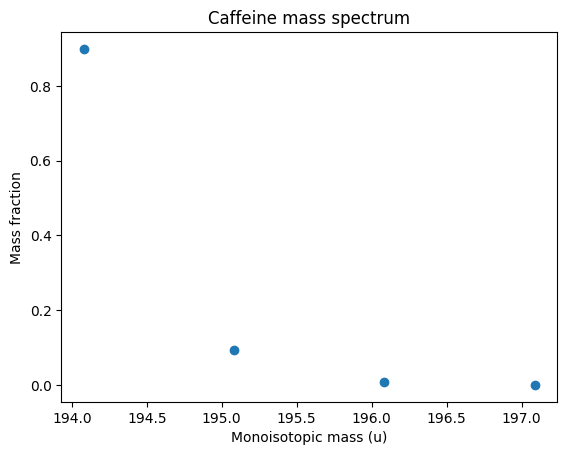

In [ ]:
#|code-fold: true 
fig, ax = plt.subplots()
ax.scatter(df['Relative mass'], df['Fraction'])
ax.set_xlabel('Monoisotopic mass (u)')
ax.set_ylabel('Mass fraction')
ax.set_title('Caffeine mass spectrum');

Here is also the mass spectrum for the different isotopes of iron. 

In [ ]:
Fe = Formula('Fe')

In [ ]:
Fe.spectrum().dataframe()

,Relative mass,Fraction,Intensity %,m/z
Mass number,,,,
54,53.939609,0.05845,6.370294,53.939609
56,55.934936,0.91754,100.000000,55.934936
57,56.935393,0.02119,2.309436,56.935393
58,57.933274,0.00282,0.307344,57.933274


## `pyhrms`  

Need to look into this. 

See: [https://pypi.org/project/pyhrms/](https://pypi.org/project/pyhrms/)

## `pymzml`   

Need to look into this. 

See: [https://pypi.org/project/pymzml/](https://pypi.org/project/pymzml/) 

This seems to be an important package. Here is the documentation: [https://pymzml.readthedocs.io/en/latest/](https://pymzml.readthedocs.io/en/latest/)